# PANDAS GİRİŞ

In [ ]:
#pandas:sütunlu veri tablosu oluşturabilmesi,numpydan daha gelişmiş bir kütüphanedir
#pandasta sütunlara series nesneleri deniyor.
#pandasta sütunlar ayrı birer nesnedir, serieslar birleşerek dataframe oluşturur.
#pandas seriese nesneleri nump array şeklinde verilebilirken liste olarakta verilebilir
#series=tek boyutlu vektörlerdir bir araya gelince =>> dataframe oluşur
#numpydan farklı olarak pandasta her sütun elemanı faklı br dtypedadır.

In [ ]:
#Kazanımlar: 
#Seri oluşturma 
#İndex kavramı 
#Size özniteliği 
#Name özniteliği 
#Sıra numarasıyla indexleme  ve dilimleme
#Label ile indexleme ve dilimleme

In [1]:
#pandas series nesnesi tanımını liste şeklinde veriyorum
import pandas as pd
import numpy as np
s = pd.Series([10, 20, 30, 40, 50])
print(s)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [4]:
#pandas series nesnesi tanımını np.array şeklinde veriyorum
import pandas as pd
import numpy as np
a = np.array([10, 20, 30, 40, 50], dtype='float32')
s = pd.Series(a)
print(type(s))
print(s)
print()

<class 'pandas.core.series.Series'>
0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float32



In [3]:
#series nesneleri indexlere sahiptir.İndexler farklı tiplerden olabilirler elemana erişimi indexler kolaylaştırır.
#string tipinde index tanımı
import pandas as pd
import numpy as np
a = np.array([10, 20, 30, 40, 50], dtype='float32')
s = pd.Series(a, dtype='float64', index=['Ali', 'Veli', 'Selami', 'Ayşe', 'Fatma'])
print(s)
print()


Ali       10.0
Veli      20.0
Selami    30.0
Ayşe      40.0
Fatma     50.0
dtype: float64



In [6]:
#bir csv dosyasını loadtxt ile okuyup np seriese atama yaparsam 
import pandas as pd
import numpy as np
a = np.loadtxt('dring.csv', delimiter=',', dtype='str', encoding='utf-8', skiprows=1)
beer_servings = a[:, 1].astype('float32') #dtype float32 ye çevirdim
s = pd.Series(beer_servings)
print(s)

0        0.0
1       89.0
2       25.0
3      245.0
4      217.0
       ...  
188    333.0
189    111.0
190      6.0
191     32.0
192     64.0
Length: 193, dtype: float32


In [7]:
#bir csv dosyasını loadtxt ile okuyup indexini ilk sütunu yapmak istersem
import pandas as pd
import numpy as np
drings = np.loadtxt('dring.csv', delimiter=',', dtype='str', encoding='utf-8', skiprows=1)
beer_servings = drings[:, 1].astype('float32')
s = pd.Series(beer_servings, index=drings[:, 0],name='Beer Servings') #name parametresi ile dataframe'e isim verdim 
#s.index=index=drings[:,0] şeklindede atama yapılabilir
print(s)

afghanistan      0.0
albania         89.0
algeria         25.0
andorra        245.0
angola         217.0
               ...  
venezuela      333.0
vietnam        111.0
yemen            6.0
zambia          32.0
zimbabwe        64.0
Name: Beer Servings, Length: 193, dtype: float32


# Pandas Series  Methodlar

In [ ]:
#Kazanımlar:Series methodlarım ;
#s.size() ve len(s) =>>> kaç tane kayıt olduğunu görürüm 
#s.tail => sondan 5 kayıt  listele
#s.head => baştan 5 kayıt s.head(10)= bastan 10 kayıt görmek istersem  
#s.index[3] diyerek indexlerimin 3.elemanına erişebilirim 
#s[5] diyerek seriesin 5. elemanına ulaşabilirim 
#Dilimlemek istersem s[3:10] derse 3.elemandan 10.elemana kadar erişebilirim 
#s[3:10:2] dersem 2'şer arttırarak dilimlerim 
#indexi veripte elemana ulaşabilirim s['argentina'] dersem indexi argentina olan elemana erişirim  
#s['algeria':'bolivia] dersem algeria indexinden bolivia indexine kadar dilimlerim  
#s.algeria dersem labeli örnek özniteliğiymiş gibi çağırabilirim  
#s.values dersem series nesnelerini numpy dizisi şeklinde alabilirim
#series methodları pandasta işlem yapabilmek için kritik
#value methodu 
#isna()  isnull() 
#sum() 
#count()
#shape()
#fillna(x)  
#dropna()  
#s.std() =>standart sapma
#s.var() => varyans alıyor
#s.median() => medyanı verir 
#mode() => serinin modunu verir 
#unique() => serinin unique değerlerini veriyor 
#pop() => belirli bir indexi silmek için kullanır  
#hist() => değerlerin olasılık yoğunluk fonk çizilir 
#describe() => bu method ile serinin özelliklerini bulup istediğimi çekebilirim 
#nsmallest() => en küçük n tane değeri verir
#nlargerst() => en büyük n tane değeri verir 
#sortvalue() ve sortindex() ile sort işlemini yapabiliriz  
#cumsum() ile toplayarak kümülatif olarak elemanları toplar  
#nesneadi.filter(regex='^tur') istediğim kriterde  getirebilirim 
#idmax() ve idmin() ile en büyük veya en küçük elemanın indexine ulaşabiliriz 
#todict ile değerleri sözlüğe cast edebiliriz 
#tolist() ile değerleri listeye cast edebiliriz   
#toexcel() yaparsam excele çeviririm datalarımı 
#to_csv() yaparsam istediğim veriyi csv kaydederim 

# LOC VE İLOC KULLANIMI

In [ ]:
#s.loc=sadece label indexlemede kullanılır 
#s.iloc=sırasal klasik indexlemede kullanılıyor => numara ile indexlemede kullanılıyor.
#s[] şeklinde yaparsam loc ve iloc ile yapılanların ikisinide yapabilirim 

In [9]:
import numpy as np
import pandas as pd
drings = np.loadtxt('dring.csv', delimiter=',', dtype='str', encoding='utf-8', skiprows=1)
beer_servings = drings[:, 1].astype('float32')
s = pd.Series(beer_servings, index=drings[:, 0],name='Beer Servings') #name parametresi ile dataframe'e isim verdim 
#s.index=index=drings[:,0] şeklinde de atama yapılabilir
print(s)

afghanistan      0.0
albania         89.0
algeria         25.0
andorra        245.0
angola         217.0
               ...  
venezuela      333.0
vietnam        111.0
yemen            6.0
zambia          32.0
zimbabwe        64.0
Name: Beer Servings, Length: 193, dtype: float32


In [10]:
print(s[s>100]) #100 den büyük değerleri getirmek istersem 

andorra              245.0
angola               217.0
antigua & barbuda    102.0
argentina            193.0
australia            261.0
                     ...  
united kingdom       219.0
usa                  249.0
uruguay              115.0
venezuela            333.0
vietnam              111.0
Name: Beer Servings, Length: 79, dtype: float32


In [11]:
print(s[s>100].index) #100 den büyük olan elemanların indexlerine erişmek istersem

Index(['andorra', 'angola', 'antigua & barbuda', 'argentina', 'australia',
       'austria', 'bahamas', 'barbados', 'belarus', 'belgium', 'belize',
       'bolivia', 'botswana', 'brazil', 'bulgaria', 'cabo verde', 'cameroon',
       'canada', 'chile', 'colombia', 'costa rica', 'croatia', 'cyprus',
       'czech republic', 'denmark', 'dominican republic', 'ecuador', 'estonia',
       'finland', 'france', 'gabon', 'germany', 'greece', 'grenada', 'hungary',
       'iceland', 'ireland', 'kazakhstan', 'latvia', 'lithuania', 'luxembourg',
       'malta', 'mexico', 'namibia', 'netherlands', 'new zealand', 'niue',
       'norway', 'palau', 'panama', 'paraguay', 'peru', 'poland', 'portugal',
       'south korea', 'moldova', 'romania', 'russian federation',
       'st. kitts & nevis', 'st. lucia', 'st. vincent & the grenadines',
       'samoa', 'serbia', 'seychelles', 'slovakia', 'slovenia', 'south africa',
       'spain', 'suriname', 'sweden', 'switzerland', 'macedonia',
       'trinidad & toba

In [ ]:
#Not:shape fonksiyonu s.shape =>> tek boyutlu oluyor s.size dan farkı yok 
#Bir series nesnesini bir skaler ile işleme sokarsam her eleman üzerinde işlem yapılır s=s+2 dersem her elemana  2 eklenir 
#seriesler tek boyutludur bunu asla atlamamalıyım 

#isna() fonksiyonu:s.isna() =>> boş olan değerlerde true ,dolu değerlerde false dönüyor benzeri isnull() methodudur bu methodların tersi notnull dir 
#s.sum() ile tüm serie elemanlarını toplarım 
#s.count() bu method ile seri içindeki none olmayan elemanların sayısını buluruz
#s[s.isnull()] => bu method ile nan olanları çekebilirim 
#s.fillna(100) =>na değerlerini 100 ile doldurmak istersem kullanırım, s.fillna(s.mean()) dersem na lar ortalama ile dolar
#s.dropna() => nan olan elemanlardan kurtulmak için kullanılır
#iki series nesnesi toplanırken aynı index isimleri toplanır farklı indexler için none yazılır 


# READ_CSV METHODU

928      3.540000
927      2.800000
926      0.879810
925      0.729854
924      1.130000
          ...    
4      950.000000
3      976.600000
2      982.930000
1      957.780000
0      965.260000
Name: High, Length: 929, dtype: float64


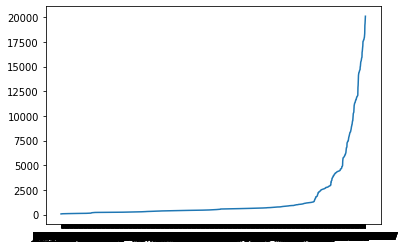

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

btc = pd.read_csv('bitcoin_price.csv', delimiter=',')

date = btc['Date']
max_price = btc['High']
max_price.index = date.values 
max_price = max_price.sort_values(ascending=True)
x = max_price.index
y = max_price.values #numpy series nesnemi arraye çevirdim 
plt.plot(x, y)

eth =  pd.read_csv('ethereum_price.csv', delimiter=',')
eth_date = eth['Date']
eth_max_price = eth['High'][::-1] #ters çevirdim  
print(eth_max_price)

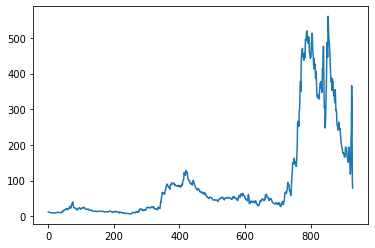

In [3]:
#iki series toplanırken indexleri aynı olan toplanır. 
#a ve b toplanmak istenirse eşleşmeyen indexleride toplamak istersem a.add(b,fiil_value=0) yaparsam eşleşmeyenleride toplama getiririm 

import pandas as pd
import numpy as np
btc = pd.read_csv('bitcoin_price.csv', delimiter=',')

btc_date = btc['Date']
btc_max_price = btc['High']
eth =  pd.read_csv('ethereum_price.csv', delimiter=',')
eth_date = eth['Date']
eth_max_price = eth['High']

result = btc_max_price / eth_max_price
result.dropna(inplace=True)
result.plot()

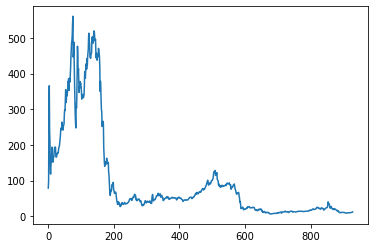

In [4]:
import pandas as pd
import numpy as np

btc = pd.read_csv('bitcoin_price.csv', delimiter=',')

btc_date = btc['Date']
btc_max_price = btc['High']

eth =  pd.read_csv('ethereum_price.csv', delimiter=',')
eth_date = eth['Date']
eth_max_price = eth['High']

result = btc_max_price / eth_max_price
result.dropna(inplace=True)

result.index = range(result.size - 1, -1, -1)
result.plot()

In [7]:
#
import pandas as pd
import numpy as np

alcohol = pd.read_csv('dring2.csv', delimiter=',')
country = alcohol['country']

total_alcohol = alcohol['total_litres_of_pure_alcohol']
total_alcohol.index = country.values
print(total_alcohol) 
print() 
print(total_alcohol.index)


afghanistan     0.0
albania         4.9
algeria         0.7
andorra        12.4
angola          5.9
               ... 
venezuela       7.7
vietnam         2.0
yemen           0.1
zambia          2.5
zimbabwe        4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

Index(['afghanistan', 'albania', 'algeria', 'andorra', 'angola',
       'antigua & barbuda', 'argentina', 'armenia', 'australia', 'austria',
       ...
       'tanzania', 'usa', 'uruguay', 'uzbekistan', 'vanuatu', 'venezuela',
       'vietnam', 'yemen', 'zambia', 'zimbabwe'],
      dtype='object', length=193)


In [8]:
#items ile değerleri ve indexleri dolaşabilirim 
import pandas as pd
import numpy as np
alcohol = pd.read_csv('dring2.csv', delimiter=',')
country = alcohol['country']

total_alcohol = alcohol['total_litres_of_pure_alcohol'].astype('float64')
total_alcohol.index = country.values
for t in total_alcohol.items():
    print(t)

('afghanistan', 0.0)
('albania', 4.9)
('algeria', 0.7)
('andorra', 12.4)
('angola', 5.9)
('antigua & barbuda', 4.9)
('argentina', 8.3)
('armenia', 3.8)
('australia', 10.4)
('austria', 9.7)
('azerbaijan', 1.3)
('bahamas', 6.3)
('bahrain', 2.0)
('bangladesh', 0.0)
('barbados', 6.3)
('belarus', 14.4)
('belgium', 10.5)
('belize', 6.8)
('benin', 1.1)
('bhutan', 0.4)
('bolivia', 3.8)
('bosnia-herzegovina', 4.6)
('botswana', 5.4)
('brazil', 7.2)
('brunei', 0.6)
('bulgaria', 10.3)
('burkina faso', 4.3)
('burundi', 6.3)
("cote d'ivoire", 4.0)
('cabo verde', 4.0)
('cambodia', 2.2)
('cameroon', 5.8)
('canada', 8.2)
('central african republic', 1.8)
('chad', 0.4)
('chile', 7.6)
('china', 5.0)
('colombia', 4.2)
('comoros', 0.1)
('congo', 1.7)
('cook islands', 5.9)
('costa rica', 4.4)
('croatia', 10.2)
('cuba', 4.2)
('cyprus', 8.2)
('czech republic', 11.8)
('north korea', 0.0)
('dr congo', 2.3)
('denmark', 10.4)
('djibouti', 1.1)
('dominica', 6.6)
('dominican republic', 6.2)
('ecuador', 4.2)
('egypt

In [9]:
#Not:mask function :Karmaşık koşullar fonksiyonlar alıp işlem yapabiliriz
#df.mask(lamda s: s=='-','nan')  #ile  - yazan ifadeyi nan ile yer değiştirmiş oldum 